In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.precision = 3

In [2]:
# These are the results of our experiments. Each executed three times.
# When you run your experiments, please comment out our results and uncomment your results below.


##
## Our results
##

skill_2_difficulty_files = [
    "results/results_in_paper/skill_2_difficulty_0.csv",
    "results/results_in_paper/skill_2_difficulty_1.csv",
    "results/results_in_paper/skill_2_difficulty_2.csv",
]


skill_2_slope_files = [
    "results/results_in_paper/skill_2_slope_0.csv",
    "results/results_in_paper/skill_2_slope_1.csv",
    "results/results_in_paper/skill_2_slope_2.csv",
]

skill_3_difficulty_files = [
    "results/results_in_paper/skill_3_difficulty_0.csv",
    "results/results_in_paper/skill_3_difficulty_1.csv",
    "results/results_in_paper/skill_3_difficulty_2.csv",
]

skill_3_slope_files = [
    "results/results_in_paper/skill_3_slope_0.csv",
    "results/results_in_paper/skill_3_slope_1.csv",
    "results/results_in_paper/skill_3_slope_2.csv",
]


##
## Your results
##

# skill_2_difficulty_files = [
#     "results/skills_2/difficulty.csv"
# ]
# skill_2_slope_files = [
#    "results/skills_2/slope.csv"
# ]
# skill_3_difficulty_files = [
#    "results/skills_3/difficulty.csv"
# ]
# skill_3_slope_files = [
#    "results/skills_3/slope.csv"
# ]

# Load Data

In [3]:
all_columns = [
    "Skill",
    "Replica",
    "Parameter",
    "Problem",
    "Dim",
    "J/I/I",
    "1/I",
    "ExpVar"
]

In [4]:
dfs = []
for i, f in enumerate(skill_2_difficulty_files):
    df = pd.read_csv(f)
    df["Skill"] = 2
    df["Replica"] = i
    df["Parameter"] = "difficulty"
    df["Dim"] = 0
    dfs.append(df[all_columns])

for i, f in enumerate(skill_3_difficulty_files):
    df = pd.read_csv(f)
    df["Skill"] = 3
    df["Replica"] = i
    df["Parameter"] = "difficulty"
    df["Dim"] = 0
    dfs.append(df[all_columns])
    
difficulty_df = pd.concat(dfs, axis=0)

In [5]:
dfs = []
for i, f in enumerate(skill_2_slope_files):
    df = pd.read_csv(f)
    df["Skill"] = 2
    df["Replica"] = i
    df["Parameter"] = "slope"
    dfs.append(df[all_columns])

for i, f in enumerate(skill_3_slope_files):
    df = pd.read_csv(f)
    df["Skill"] = 3
    df["Replica"] = i
    df["Parameter"] = "slope"
    dfs.append(df[all_columns])
    
slope_df = pd.concat(dfs, axis=0)

In [6]:
all_df = pd.concat([difficulty_df, slope_df], axis=0)

# Figures

In [7]:
def scatter_plot(
    title: str,
    fname: str,
    df: pd.DataFrame,
    parameter: str,
    skill: int,
    x_label: str,
    y_label: str,
    min_val: int,
    max_val: int,
    x_label_print: str,
    y_label_print: str,
):
    cond1 = df["Skill"] == skill
    cond2 = df["Parameter"] == parameter
    cond = cond1 & cond2
    selected_df = df.loc[cond, :]
    xs = selected_df[x_label]
    ys = selected_df[y_label]
    
    plt.figure(figsize=(5,5))
    plt.scatter(xs, ys, color="black")
    plt.plot([min_val, max_val], [min_val, max_val], linestyle="dashed", color="black")
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.xlabel(x_label_print, size=20 if x_label_print.startswith("$") else 18)
    plt.ylabel(y_label_print, size=20 if x_label_print.startswith("$") else 18)
    plt.xticks([0, 5, 10, 15, 20], size=15)
    plt.yticks([0, 5, 10, 15, 20], size=15)
    plt.title(title, fontsize=22, y=1.05)
    plt.tight_layout()

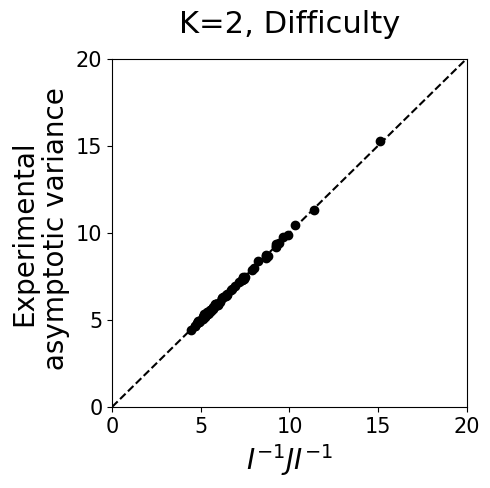

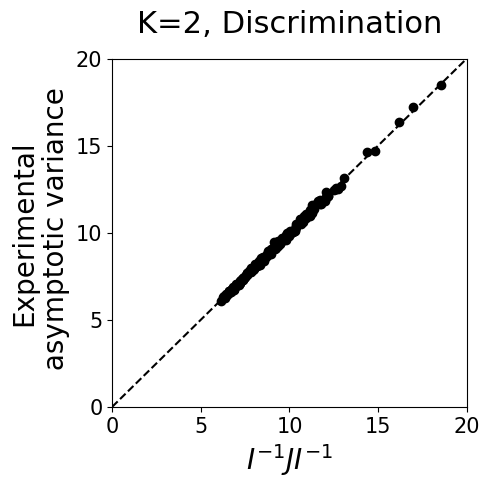

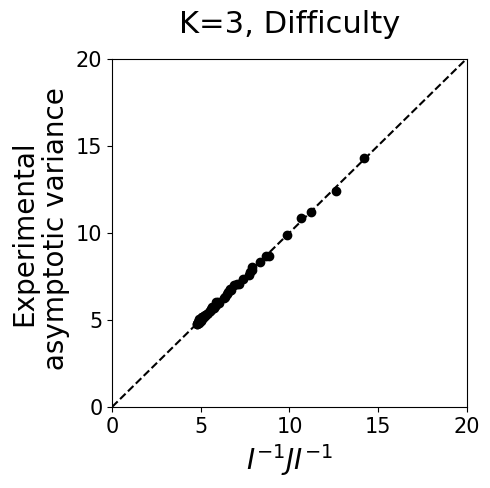

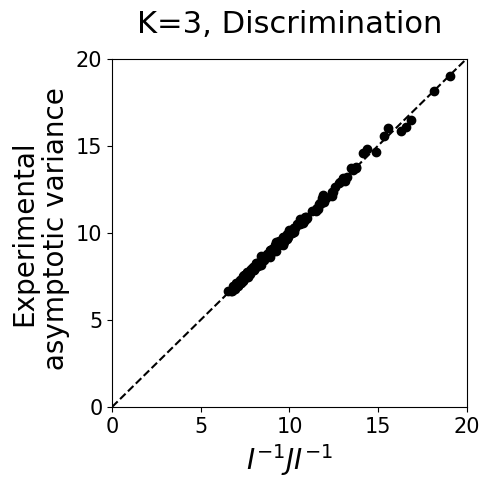

In [8]:
scatter_plot("K=2, Difficulty", "exp1_scatter_d_2", all_df, "difficulty", 2, "J/I/I", "ExpVar", 0, 20, "$I^{-1}JI^{-1}$", "Experimental\n asymptotic variance")
scatter_plot("K=2, Discrimination", "exp1_scatter_a_2", all_df, "slope", 2, "J/I/I", "ExpVar", 0, 20, "$I^{-1}JI^{-1}$", "Experimental\n asymptotic variance")
scatter_plot("K=3, Difficulty", "exp1_scatter_d_3", all_df, "difficulty", 3, "J/I/I", "ExpVar", 0, 20, "$I^{-1}JI^{-1}$", "Experimental\n asymptotic variance")
scatter_plot("K=3, Discrimination", "exp1_scatter_a_3", all_df, "slope", 3, "J/I/I", "ExpVar", 0, 20, "$I^{-1}JI^{-1}$", "Experimental\n asymptotic variance")

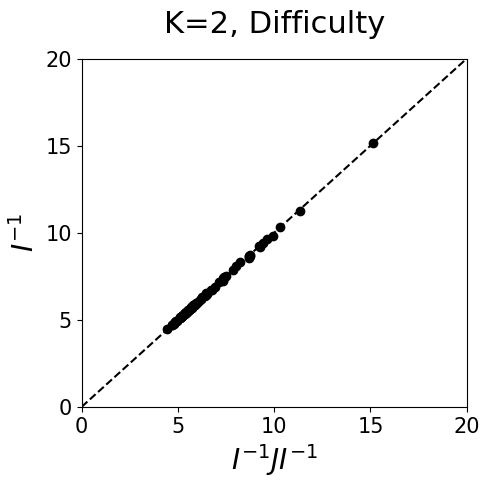

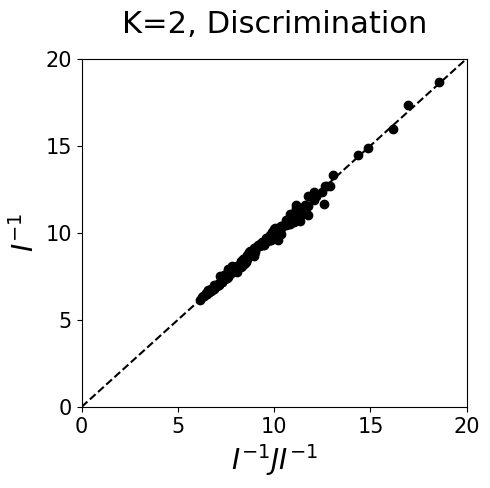

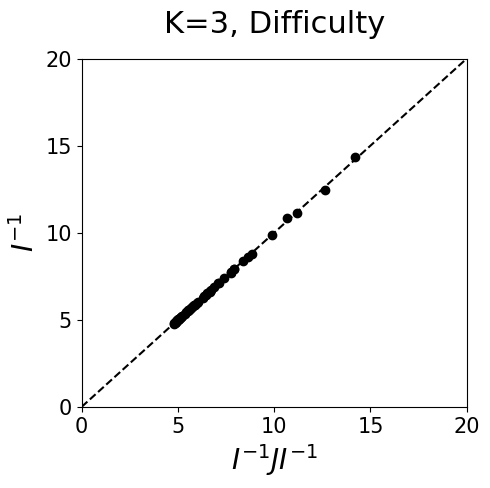

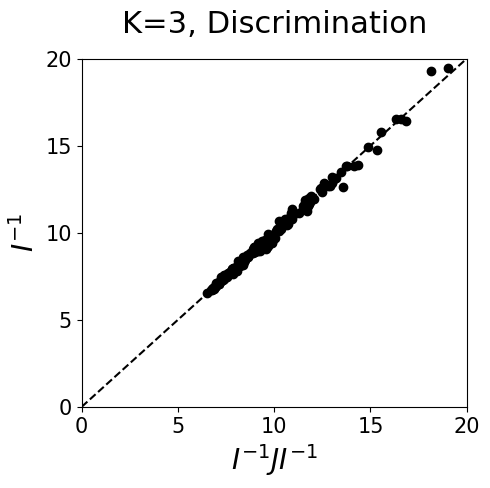

In [9]:
scatter_plot("K=2, Difficulty", "exp2_scatter_d_2", all_df, "difficulty", 2, "J/I/I", "1/I", 0, 20, "$I^{-1}JI^{-1}$", "$I^{-1}$")
scatter_plot("K=2, Discrimination", "exp2_scatter_a_2", all_df, "slope", 2, "J/I/I", "1/I", 0, 20, "$I^{-1}JI^{-1}$", "$I^{-1}$")
scatter_plot("K=3, Difficulty", "exp2_scatter_d_3", all_df, "difficulty", 3, "J/I/I", "1/I", 0, 20, "$I^{-1}JI^{-1}$", "$I^{-1}$")
scatter_plot("K=3, Discrimination", "exp2_scatter_a_3", all_df, "slope", 3, "J/I/I", "1/I", 0, 20, "$I^{-1}JI^{-1}$", "$I^{-1}$")

# Tables

In [10]:
def create_table(df):
    cols = ["Skill", "Parameter", "J/I/I", "1/I", "ExpVar"]
    select_df = df[cols].copy()
    
    select_df["Err1"] = (select_df["J/I/I"] - select_df["ExpVar"]).abs()
    select_df["Err2"] = (select_df["1/I"] - select_df["J/I/I"]).abs()
    
    select_df["RelErr1"] = (select_df["J/I/I"] - select_df["ExpVar"]).abs() / select_df["ExpVar"] * 100.0
    select_df["RelErr2"] = (select_df["1/I"] - select_df["J/I/I"]).abs() / select_df["J/I/I"] * 100.0

    agg_param = {
        "Err1": ["mean"],
        "Err2": ["mean"],
        "RelErr1": ["mean"],
        "RelErr2": ["mean"],
    }
    output_df = select_df.groupby(by=["Skill", "Parameter"]).agg(agg_param)

    return output_df

In [11]:
all_metric_df = create_table(all_df).T

In [12]:
exp1_df = all_metric_df.iloc[[0, 2], :].copy()
exp1_df.index = ["MAE", "MAPE (%)"]
exp1_df

Skill              2                 3       
Parameter difficulty  slope difficulty  slope
MAE            0.051  0.089      0.122  0.262
MAPE (%)       0.721  0.911      0.832  1.153

In [13]:
exp2_df = all_metric_df.iloc[[1,3], :].copy()
exp2_df.index = ["MAE", "MAPE (%)"]
exp2_df

Skill              2                 3       
Parameter difficulty  slope difficulty  slope
MAE            0.023  0.128      0.049  0.282
MAPE (%)       0.300  1.309      0.360  1.463